In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.datasets import fetch_openml

### 1. Demo: Random Forest Feature Importance for Feature Selection

In [3]:
mnist = fetch_openml('mnist_784')

c:\Users\ATISHAY SG\anaconda3\envs\AIMLSem1\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
df = mnist.data
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# combine label into dataframe
df['label'] = mnist.target
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
df.shape

(70000, 785)

In [8]:
# look at features and labels separately
X = df.iloc[:,0:-1:]
y = df.iloc[:,-1]

In [9]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


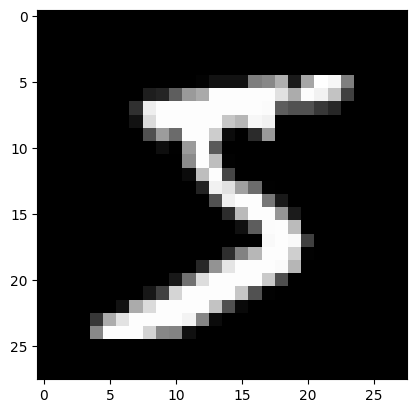

In [10]:
image = X.iloc[0].values.reshape(28,28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

<Axes: >

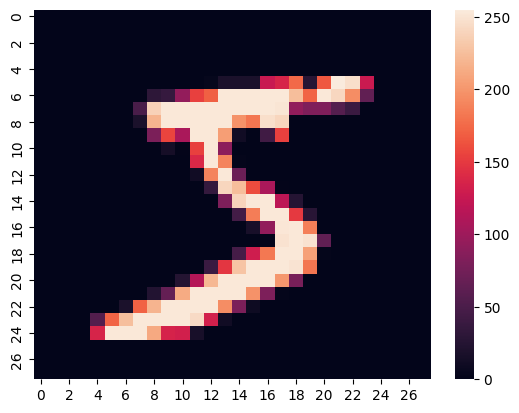

In [11]:
sns.heatmap(X.iloc[0].values.reshape(28,28))

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [14]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.22126802e-06, 3.06851037e-07,
       2.04039531e-06, 8.13611057e-07, 1.17002368e-06, 6.42068065e-06,
       8.91841821e-07, 3.04269134e-06, 2.40548198e-06, 3.69811943e-06,
       6.90829783e-06, 3.17626345e-06, 3.03318509e-07, 1.45090699e-06,
       2.64646989e-07, 8.32559989e-07, 7.63256420e-07, 1.22644265e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [15]:
rf.feature_importances_.shape

(784,)

<Axes: >

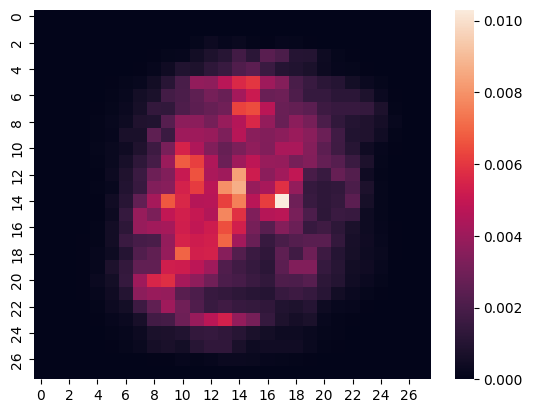

In [16]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

In [17]:
np.where(rf.feature_importances_ > 0.004)[0].shape

(82,)

### 2. Remove constant/quasi-constant features

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^n (x^{(i)}-\bar{x})^2
$$

| F1 | F2 | F3 | F4 |
| --- | --- | --- | --- |
| 1 | 0 | 1 | 2 |
| 2 | 8 | 1 | 2 |
| 4 | 5 | 1 | 2 |
| 6 | 6 | 1 | 0 |
| 9 | 4 | 1 | 2 |


1. Features with zero or low variance do not explain the target variable in any way (i.e. no predictive power).
2. Such features can be removed by using VarianceThreshold transformer
3. It takes a threshold cut-off value. All values below that threshold value will be dropped
4. Default threshold value = 0. It drops only constant
5. A quasi-constant feature, using a threshold of 0.1 means 90% of the values are similar
6. Although not mandatory, normalizing (not standardizing) the features before applying VarianceThreshold is a good idea for exploratory purposes of fairer comparison of variance across features and set a cutoff. Otherwise variance is a running value
7. Can be applied for Categorical variables after Label/Ordinal Encoding



**Implementation**:
Used below is a public dataset from 2012 U.S. Army Anthropometric Survey: http://mreed.umtri.umich.edu/mreed/downloads/anthro/ANSUR2Distribution.zip. The zip contains CSV for male and female. Only make dataset is used for testing VarianceThreshold


In [18]:
#Demo
from sklearn.preprocessing import OneHotEncoder

X = [['blue'], ['green'], ['blue'], ['blue'], 
     ['green'], ['red'], ['blue'], ['green']]
y = [0, 0, 1, 0, 0, 1, 0, 0]

enc = OneHotEncoder(drop='first')
enc.fit(X)
X_ohe = enc.transform(X)
X_ohe.toarray()

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [19]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_ohe)
sel.transform(X_ohe).toarray()

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [21]:
retval = sel.transform(X_ohe)
type(retval)
retval

<8x1 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

**On real dataset**

In [22]:
df = pd.read_csv("data/ANSUR II MALE Public.csv", encoding='latin')
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [23]:
df.drop(columns=["subjectid"], inplace=True)
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [24]:
df.shape # 107 features

(4082, 107)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("data/ANSUR II MALE Public.csv", encoding='latin')
df.drop(columns=["subjectid"], inplace=True)

df = df.select_dtypes(include='number')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [27]:
X_train.shape

(2857, 97)

##### 2.1 Run with all features

Note the accuracy and time taken

In [28]:
%%timeit
model = RandomForestRegressor(random_state=42)
_ = model.fit(X_train, y_train)

15.9 s ± 429 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
model = RandomForestRegressor(random_state=42)
_ = model.fit(X_train, y_train)
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Test Score: {model.score(X_test, y_test)}")

Training Score: 0.9881479469826502
Test Score: 0.9492110737733014


##### 2.2 Identify quasi-constant features with Pandas

In [30]:
x_mean = X_train.mean()
x_mean

abdominalextensiondepthsitting     254.275814
acromialheight                    1440.459573
acromionradialelength              335.198110
anklecircumference                 229.320266
axillaheight                      1328.778089
                                     ...     
wristheight                        847.625481
SubjectNumericRace                   8.388519
DODRace                              1.513826
Age                                 30.015401
Heightin                            70.017501
Length: 97, dtype: float64

In [34]:
X_train_normalized = X_train / x_mean
X_test_normalized = X_test/x_mean

print(X_train_normalized)
print("--------------------------------------------------------------------------")
print(X_test_normalized)

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
2147                        0.892731        1.039946               1.073992   
1268                        0.829808        0.967052               0.930793   
1078                        1.038243        1.079517               1.079958   
1288                        0.963521        0.959416               0.906926   
1557                        1.203418        1.020508               1.014326   
...                              ...             ...                    ...   
1130                        1.195552        1.019119               1.053109   
1294                        0.794413        0.987185               0.966593   
860                         1.093301        1.022590               1.026259   
3507                        0.877000        1.005929               0.972559   
3174                        0.880933        0.953168               0.912893   

      anklecircumference  axillaheight  balloffootc

In [36]:
quasi_constant_features = [feat for feat in X_train.columns if X_train_normalized[feat].var() <= 0.03]
print(quasi_constant_features)

['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumfe

##### 2.3. Identify quasi-constant features with VarianceThreshold

1. StandardScaler is not used because it sets variance = 1
2. Normalizer is not used because the output of the transformer will no longer be a dataframe. We will do it from scratch

In [37]:
#from sklearn.preprocessing import Normalizer

#normalizer = Normalizer()
#X_train_normalized = normalizer.fit_transform(X_train)
#X_test_normalized = normalizer.transform(X_test)

# Normalizer is not used because the output is no longer a dataframe.
# We will do it frm scratch

In [38]:
x_mean = X_train.mean()
x_mean

abdominalextensiondepthsitting     254.275814
acromialheight                    1440.459573
acromionradialelength              335.198110
anklecircumference                 229.320266
axillaheight                      1328.778089
                                     ...     
wristheight                        847.625481
SubjectNumericRace                   8.388519
DODRace                              1.513826
Age                                 30.015401
Heightin                            70.017501
Length: 97, dtype: float64

In [39]:
X_train_normalized = X_train / x_mean
X_test_normalized = X_test/x_mean

In [40]:
X_train_normalized.var()

abdominalextensiondepthsitting     0.021077
acromialheight                     0.001917
acromionradialelength              0.002652
anklecircumference                 0.004110
axillaheight                       0.001984
                                    ...    
wristheight                        0.002413
SubjectNumericRace                99.968372
DODRace                            0.387731
Age                                0.085438
Heightin                           0.001719
Length: 97, dtype: float64

**Observation**: Applying a threshold of 0.003 removes approximately 50% of the features

In [41]:
np.where(X_train_normalized.var() > 0.003)

(array([ 0,  3,  8,  9, 10, 11, 15, 16, 17, 20, 22, 23, 24, 27, 28, 29, 30,
        31, 32, 37, 38, 48, 49, 50, 53, 54, 55, 58, 59, 61, 62, 65, 66, 69,
        77, 78, 80, 84, 85, 86, 87, 88, 90, 93, 94, 95], dtype=int64),)

In [42]:
np.where(X_train_normalized.var() > 0.003)[0].shape

(46,)

In [43]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.003)
vt.fit_transform(X_train_normalized)

mask = vt.get_support()
mask # mask tells which column to retain or remove

array([ True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False])

In [44]:
X_train_final = X_train_normalized.loc[:, mask]
X_test_final = X_test_normalized.loc[:, mask]

In [45]:
vt.get_feature_names_out() #show the retained features

array(['abdominalextensiondepthsitting', 'anklecircumference',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'calfcircumference',
       'chestbreadth', 'chestcircumference', 'chestdepth',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'lateralmalleolusheight',
       'lowerthighcircumference', 'neckcircumference',
       'neckcircumferencebase', 'poplitealheight', 'radialestylionlength',
       'shoulderlength', 'thighcircumference', 'thighclearance',
       'tibialheight', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'weightkg', 'Subj

In [46]:
X_train_final.shape # Ensure that the number of columns is half

(2857, 46)

In [47]:
%%timeit
model = RandomForestRegressor(random_state=42)
_ = model.fit(X_train_final, y_train)

7.47 s ± 74.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
model = RandomForestRegressor(random_state=42)
_ = model.fit(X_train_final, y_train)
print(f"Training Score: {model.score(X_train_final, y_train)}")
print(f"Test Score: {model.score(X_test_final, y_test)}")

Training Score: 0.9886166618798503
Test Score: 0.9495849559329486


**Observations**: 
1. Time taken for model training is reduced by more than half.
2. Model accuracy is not at all affected on both train and test 

##### 2.4 Identify quasi-constant features with Feature Engine

1. !pip install feature-engine
2. Feature-engine is an open source Python library with the most exhaustive battery of transformers to engineer features for use in machine learning models. Feature-engine simplifies and streamlines the implementation of and end-to-end feature engineering pipeline, by allowing the selection of feature subsets within its transformers, and returning dataframes for easy data exploration. Feature-engine’s transformers preserve Scikit-learn functionality with the methods fit() and transform() to learn parameters from and then transform data
3. https://feature-engine.trainindata.com/en/latest/
4. https://feature-engine.trainindata.com/en/latest/api_doc/index.html
5. https://feature-engine.trainindata.com/en/latest/user_guide/selection/DropConstantFeatures.html
6. DropConstantFeatures takes a tolerance level. E.g. tol=.7 to remove features that show the same value in more than 70% of the observations
7. Here is a good executive summary of available product features: https://trainindata.medium.com/feature-engine-a-new-open-source-python-package-for-feature-engineering-29a0ab88ea7c

In [49]:
from sklearn.model_selection import train_test_split
from feature_engine.datasets import load_titanic
from feature_engine.selection import DropConstantFeatures

X, y = load_titanic(return_X_y_frame=True, handle_missing=True,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
X_train.shape # 13 features

(916, 13)

In [51]:
X_train['embarked'].value_counts(normalize = True)

S          0.711790
C          0.195415
Q          0.090611
Missing    0.002183
Name: embarked, dtype: float64

**Observation** More than 70% of values in the embarked feature are same viz S

In [52]:
transformer = DropConstantFeatures(tol=0.7)
transformer.fit(X_train)
transformer.features_to_drop_

['parch', 'cabin', 'embarked', 'body']

In [53]:
X_train_vars = transformer.transform(X_train)
X_test_vars = transformer.transform(X_test)

In [54]:
X_train_vars.shape # 4 features dropped

(916, 9)

In [55]:
transformer.get_support() #this is similar to sklearn VarianceThreshold 

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True]

### 3. Highly correlated features

While high correlation between feature and target is good, high correlation between features is not good

##### 3.1 Visualize heatmap

**Warning**
1. Correlation is a linear measure. 
2. There can be non linear relation. That will not be measured by pearson's correlation 
3. Use mutual information to measure that

In [56]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing["target"] = housing.target
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


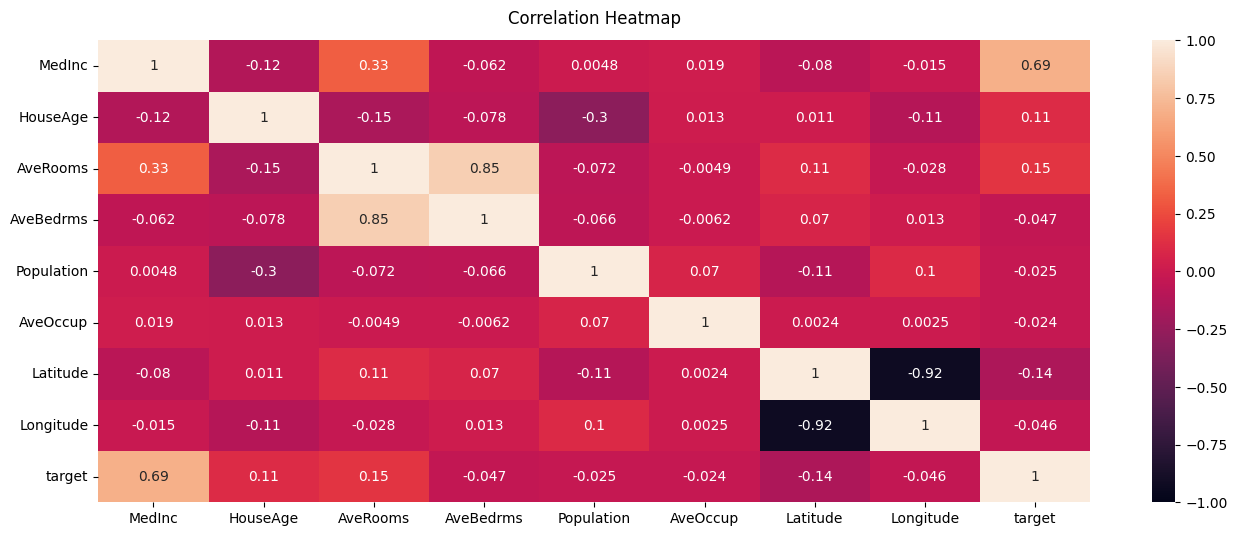

In [57]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when 
# you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and 
# set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_housing.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Observations**: AveRooms and AveBedrooms are highly correlated

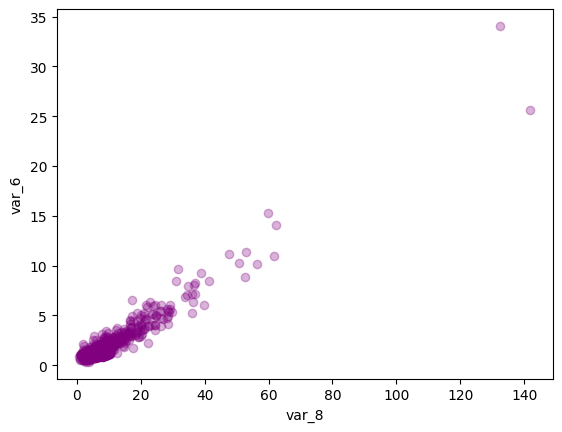

In [58]:
plt.scatter(df_housing["AveRooms"], df_housing["AveBedrms"], alpha=0.3, color="purple")
plt.xlabel("var_8")
plt.ylabel("var_6")
plt.show()

A diverging color palette that has markedly different colors at the two ends of the value-range with a pale, almost colorless midpoint, works much better with correlation heatmaps than the default colormap

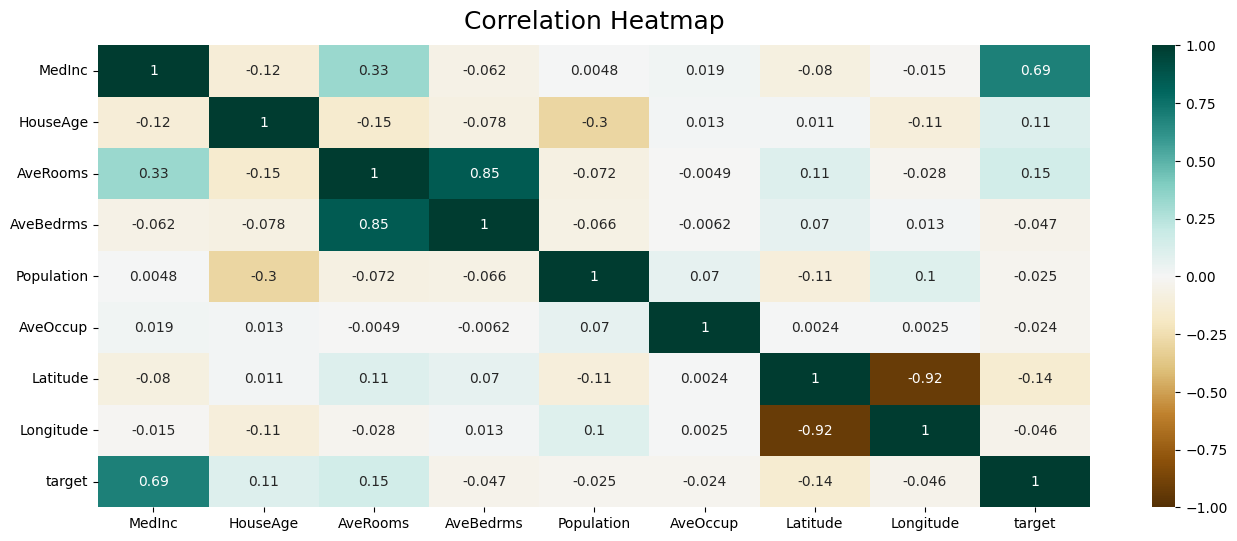

In [59]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_housing.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Removing target column with triu-1 lets us focus only on features

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_15384\4131877618.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_housing.corr(), dtype=np.bool))


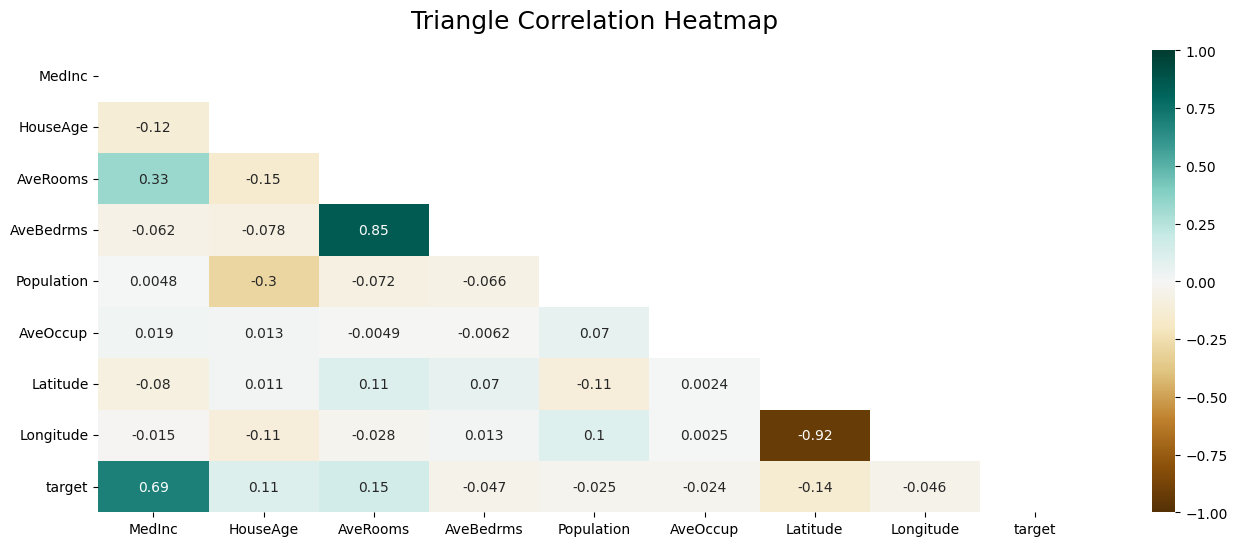

In [60]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_housing.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_housing.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

##### 3.2 Spearman correlation

In this case Spearman correlation does not deviate much from pearson for Latitude and Longitude. However Spearmzn correlation between AveRooms and AvgBedrooms very less. Correpsonding pearson correlation was high. This indicates either one of those two columns contain outliers or some other reason

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_15384\26950081.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_housing.corr(), dtype=np.bool))


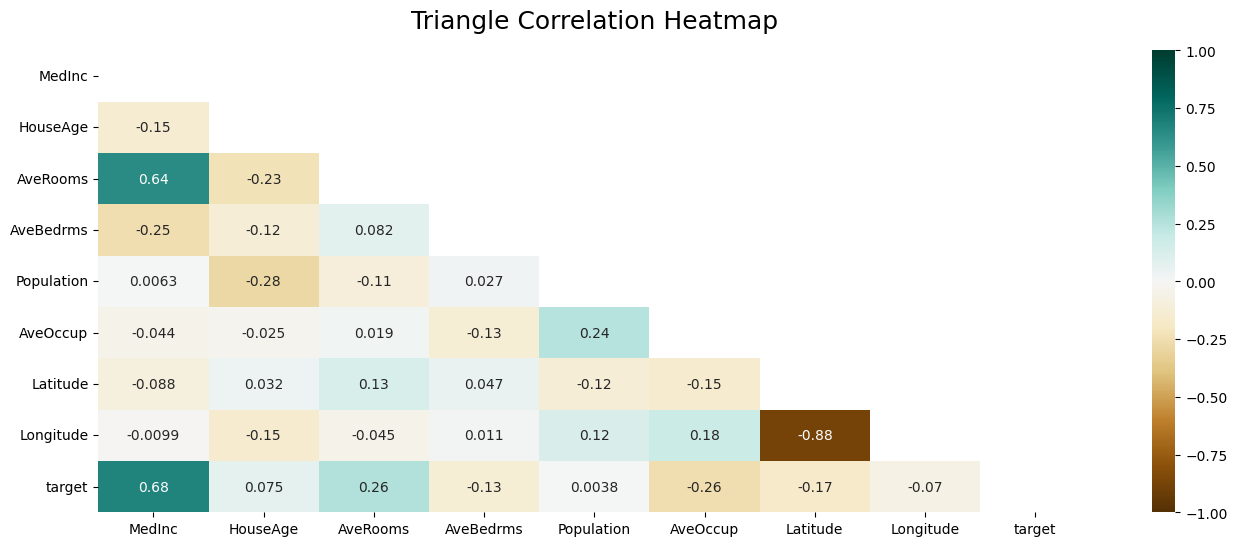

In [61]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_housing.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_housing.corr(method="spearman"), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#### 3.3 Using Feature Engine to drop correlated features

In [62]:
print(f"Number of features: {df_housing.iloc[:,:-1].shape}")

Number of features: (20640, 8)


In [63]:
from feature_engine.selection import DropCorrelatedFeatures

sel = DropCorrelatedFeatures(method="pearson", threshold=0.8)
sel.fit(df_housing.iloc[:,:-1])

DropCorrelatedFeatures()

In [64]:
sel.correlated_feature_sets_

[{'AveBedrms', 'AveRooms'}, {'Latitude', 'Longitude'}]

In [65]:
sel.features_to_drop_

{'AveBedrms', 'Longitude'}

In [66]:
X_no_corr = sel.transform(df_housing.iloc[:,:-1]) # 2 columns are dropped 
X_no_corr.shape

(20640, 6)

##### 3.4 Remove correlated features and retain the best correlated feature with target

1. Removing correlated features in previous section removed all but one correlated feature.
2. But there is no guarantee that the retained feature is the one that has best correlation with target variable
3. In a given dataset, we can find groups of features that are correlated among themselves or to a given feature. From every one of these groups, we can retain the feature that brings most value to the
predictive model and remove the rest
4. FeatureEngine provides a class called SmartCorrelatedSelection for this purpose. 
5. SmartCorrelatedSelection identifies features with a correlation coefficient higher configured value, then retain the feature with the highest importance from each group of correlated variables.
6. In this sense it is a wrapper method, but the goal it achieves is similar to Filter method

In [67]:
X = df_housing.iloc[:,:-1]
y = df_housing.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import SmartCorrelatedSelection

sel = SmartCorrelatedSelection(method="pearson", threshold=0.8, 
                               selection_method="model_performance",
                               estimator=RandomForestRegressor(n_estimators=5, random_state=10),
                               scoring="r2", cv=3)

In [69]:
sel.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestRegressor(n_estimators=5,
                                                         random_state=10),
                         scoring='r2', selection_method='model_performance')

In [70]:
sel.features_to_drop_

['AveBedrms', 'Latitude']

In [71]:
X_train_uncorrel = sel.transform(X_train)
X_test_uncorrel = sel.transform(X_test)

In [72]:
X_train_uncorrel.shape

(14448, 6)

### 4. Filter methods

1. All filter methods are supervised.
2. Implemented froms scratch and with SelectKBest

##### 4.1 Data preprocessing of Titanic

In [73]:
# titanic=sns.load_dataset('titanic')

titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

c:\Users\ATISHAY SG\anaconda3\envs\AIMLSem1\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [74]:
df_titanic = titanic[0]
df_titanic['survived'] = titanic[1] 
df_titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [75]:
df_titanic.shape

(1309, 14)

In [76]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [77]:
print(f"Unique values for feature cabin {df_titanic['cabin'].nunique()}")
print(f"Unique values for feature body {df_titanic['body'].nunique()}")
print(f"Unique values for feature boat {df_titanic['boat'].nunique()}")


Unique values for feature cabin 186
Unique values for feature body 121
Unique values for feature boat 27


In [78]:
df_titanic['survived'].isna().sum()

0

In [79]:
df_titanic.drop(columns=["name", "ticket", "cabin", "body", "home.dest", "boat"], inplace=True)
df_titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0


In [82]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   sex       1309 non-null   category
 2   age       1046 non-null   float64 
 3   sibsp     1309 non-null   float64 
 4   parch     1309 non-null   float64 
 5   fare      1308 non-null   float64 
 6   embarked  1307 non-null   category
 7   survived  1309 non-null   category
dtypes: category(3), float64(5)
memory usage: 55.5 KB


In [83]:
df_series = df_titanic["embarked"].isna()
np.where(df_series)

(array([168, 284], dtype=int64),)

In [84]:
df_titanic.drop(np.where(df_titanic["embarked"].isna())[0], inplace=True)
df_titanic.drop(np.where(df_titanic["fare"].isna())[0], inplace=True)
df_titanic.shape

(1306, 8)

In [85]:
df_titanic['embarked'].value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

In [86]:
X = df_titanic.iloc[:,:-1:]
y = df_titanic.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [87]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
sex_train_encoded = lbl_encoder.fit_transform(X_train["sex"])
sex_test_encoded = lbl_encoder.transform(X_test["sex"])

lbl_encoder2 = LabelEncoder()
embark_train_encoded = lbl_encoder.fit_transform(X_train["embarked"])
embark_test_encoded = lbl_encoder.transform(X_test["embarked"])

tgt_encoder = LabelEncoder()
y_train_encoded = tgt_encoder.fit_transform(y_train)
y_test_encoded = tgt_encoder.transform(y_test)

In [88]:
X_train_new = np.hstack( 
    (X_train.iloc[:,0:1].to_numpy(), sex_train_encoded.reshape(-1,1), 
     X_train.iloc[:,2:6].to_numpy(), embark_train_encoded.reshape(-1,1)))
X_test_new = np.hstack(
    (X_test.iloc[:,0:1].to_numpy(), sex_test_encoded.reshape(-1,1), 
     X_test.iloc[:,2:6].to_numpy(), embark_test_encoded.reshape(-1,1)))

In [89]:
X_train_new

array([[ 3.    ,  1.    , 32.    , ...,  0.    , 56.4958,  2.    ],
       [ 2.    ,  1.    , 27.    , ...,  0.    , 26.    ,  2.    ],
       [ 3.    ,  1.    , 35.    , ...,  0.    ,  7.8958,  2.    ],
       ...,
       [ 3.    ,  1.    ,     nan, ...,  0.    ,  7.25  ,  2.    ],
       [ 3.    ,  0.    , 22.    , ...,  0.    ,  8.9625,  2.    ],
       [ 3.    ,  1.    ,     nan, ...,  0.    ,  7.8958,  2.    ]])

In [90]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')
X_train_imputed = imputer.fit_transform(X_train_new)
X_train_imputed[0:5]

array([[ 3.    ,  1.    , 32.    ,  0.    ,  0.    , 56.4958,  2.    ],
       [ 2.    ,  1.    , 27.    ,  0.    ,  0.    , 26.    ,  2.    ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  7.8958,  2.    ],
       [ 3.    ,  0.    , 26.    ,  1.    ,  1.    , 22.025 ,  2.    ],
       [ 3.    ,  1.    , 33.    ,  0.    ,  0.    ,  8.6542,  2.    ]])

##### 4.2 Finding feature importance with mutual information

In [91]:
from scipy.stats.contingency import crosstab
from sklearn.metrics import mutual_info_score

In [92]:
# method 1 direct
mi = mutual_info_score(y_train, X_train['sex'])
mi

0.14261707992354503

In [93]:
# method 2 get crosstab first and then mi
c = crosstab(y_train, X_train['sex'])
c

CrosstabResult(elements=(array(['0', '1'], dtype=object), array(['female', 'male'], dtype=object)), count=array([[ 91, 479],
       [235, 109]]))

In [94]:
mutual_info_score(labels_true=None, labels_pred=None, contingency = c[1])

0.14261707992354503

**Conclusion** There is mutual information between sex and survived

##### 4.3 Find mutual information in the most direct manner between all features and categorical target


Text(0.5, 0, 'Mutual Information Score')

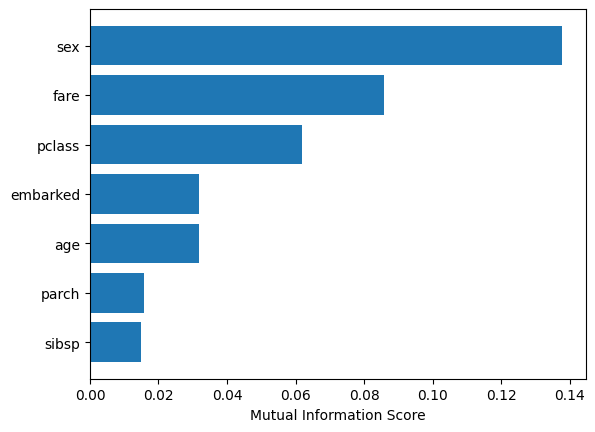

In [95]:
from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(X_train_imputed, y_train, n_neighbors=10, random_state=22)
sorted_idx = np.argsort(mi_score)
mi_scoredf = pd.DataFrame(
    mi_score[sorted_idx[::-1]], 
    index=X_train.columns[sorted_idx[::-1]], 
    columns=['mi_score'])
plt.barh(
    X_train.columns[sorted_idx], 
    mi_score[sorted_idx])
plt.xlabel("Mutual Information Score")

##### 4.4 Mutual Information between numerical/categorical feature and a numerical feature

In [103]:
from sklearn.feature_selection import mutual_info_regression

#fare and age
mutual_info_regression(X_train_imputed[:,5].reshape(-1,1), 
                       X_train_imputed[:,2], discrete_features=[False])

array([0.448756])

##### 4.5 Find feature importance with chi square test

In [104]:
c = pd.crosstab(y_train, X_train['sex'])
c

sex,female,male
survived,,
0,91,479
1,235,109


In [98]:
from scipy.stats import chi2_contingency

chi2_contingency(c)

Chi2ContingencyResult(statistic=253.93716682634448, pvalue=3.598554217360912e-57, dof=1, expected_freq=array([[203.30415755, 366.69584245],
       [122.69584245, 221.30415755]]))

Text(0.5, 1.0, 'Feature importance based on chi-square test')

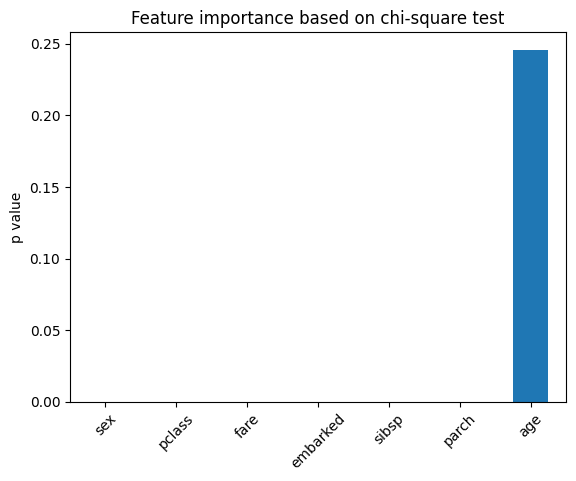

In [99]:
chi_ls = []
for feature in X_train.columns: # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    # chi-square test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")

In [ ]:
selected = pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True)[0:3].index
selected

##### 4.6 Feature Selection with SelectKBest and scoring = chisquared

In [106]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
kbest = SelectKBest(score_func=chi2, k=4)
fit = kbest.fit(X_train_imputed, y_train)
fit.scores_

In [ ]:
kbest.get_feature_names_out()

In [ ]:
df_titanic.columns[[0,1,5,6]]

##### 4.6 Feature Selection with SelectKBest and scoring = mutual_info_classification

In [107]:
kbest = SelectKBest(score_func=mutual_info_classif, k=4)
fit = kbest.fit(X_train_imputed, y_train)
fit.scores_

array([0.05952667, 0.15754207, 0.05900561, 0.00693709, 0.02270444,
       0.13729714, 0.02682713])

In [108]:
kbest.get_feature_names_out() #notice the difference between this and chisquared based feature selection

array(['x0', 'x1', 'x2', 'x5'], dtype=object)

##### 4.4 Apply chisquared to wine dataset


In [109]:
from sklearn.datasets import load_wine

X,y=load_wine(return_X_y=True)

# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
wine_kbest = SelectKBest(score_func=chi2, k=4)
_ = wine_kbest.fit(X, y)

wine_kbest.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

In [110]:
wine_kbest.get_feature_names_out()

array(['x4', 'x6', 'x9', 'x12'], dtype=object)

### 5. Feature Selection with Lasso Regression

1. For Lasso with Linear Regression, see linear_regression_reference.ipynb
2. Below is code for logistic regression with L1

In [111]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [112]:
df_wine.shape

(178, 14)

In [113]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [114]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [115]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [116]:
lr.intercept_

array([-1.26325863, -1.21582204, -2.36953031])

In [117]:
lr.coef_

array([[ 1.24546025,  0.18057863,  0.74187184, -1.15957896,  0.        ,
         0.        ,  1.17507308,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54123423,  2.51106561],
       [-1.5377546 , -0.38675307, -0.99534864,  0.36448748, -0.05929708,
         0.        ,  0.66782059,  0.        ,  0.        , -1.93331232,
         1.2350916 ,  0.        , -2.2326155 ],
       [ 0.134591  ,  0.16945437,  0.35744592,  0.        ,  0.        ,
         0.        , -2.43345487,  0.        ,  0.        ,  1.56357794,
        -0.81883991, -0.49495586,  0.        ]])

In [118]:
lr.coef_[lr.coef_!=0].shape

(23,)

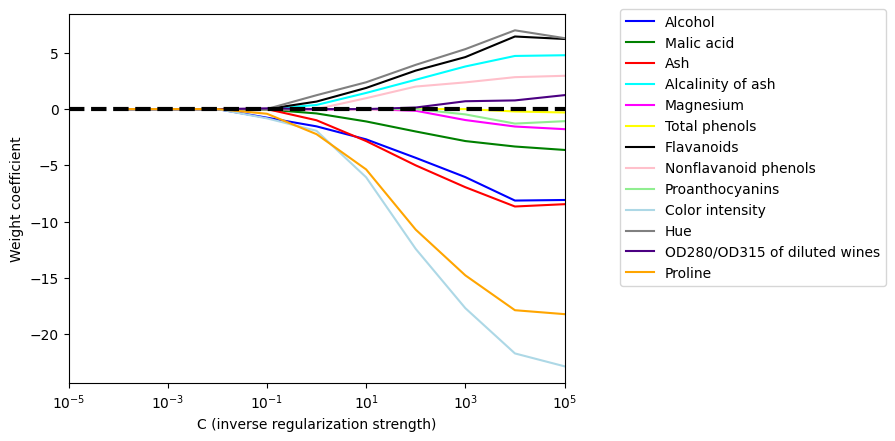

In [119]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.savefig('lasso-path.pdf', dpi=300, 
            bbox_inches='tight', pad_inches=0.2)
plt.show()

### 6. Feature Selection with Feature Importance in Decision Tree

1. DIY
2. Using sklearn
 

In [120]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [121]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

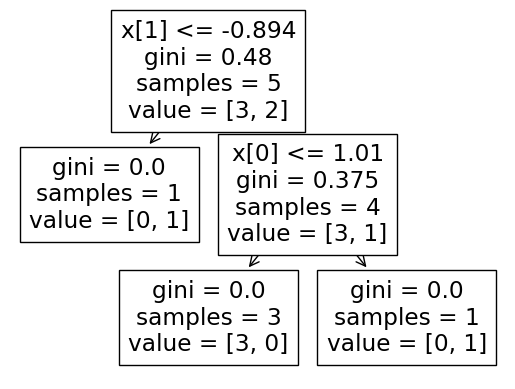

In [122]:
from sklearn.tree import plot_tree
plot_tree(clf)

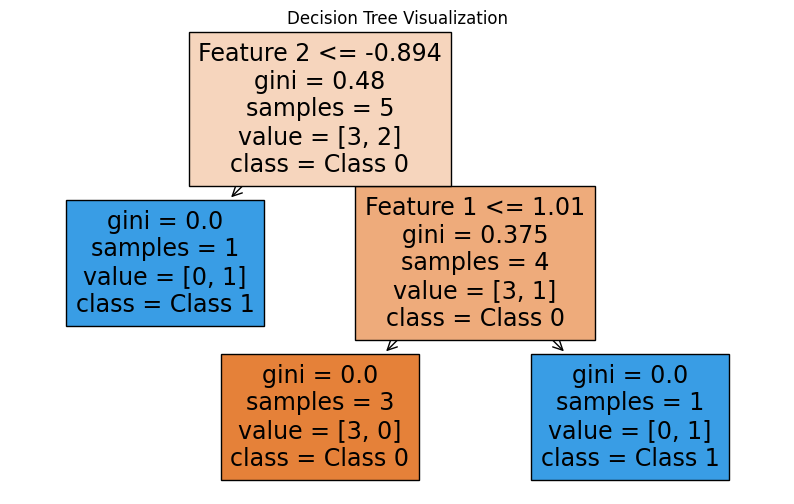

In [123]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a toy dataset
X, y = make_classification(n_samples=5, n_classes=2,
                           n_features=2, n_informative=2, n_redundant=0,
                           random_state=0)

# Create and train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Visualization")
plt.show()


**Exercise: Calculate feature importance using the formula**

**Calculate feature importance using sklearn**

In [ ]:
clf.feature_importances_

### 7. How Feature Importance is calculated in Random Forest

Run the relevant section from bagging_ensemble_randomforest.ipynb

### 8. Problems with Tree based default feature importance

1. Inflated feature importance for numerical feature
2. Inflated feature importance for categorical feature with high cardinality

In [ ]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
df_titanic = titanic[0]
df_titanic['survived'] = titanic[1] 
df_titanic.drop(columns=["name", "ticket", "cabin", "body", "home.dest", "boat"], inplace=True)
df_titanic.drop(np.where(df_titanic["embarked"].isna())[0], inplace=True)
df_titanic.drop(np.where(df_titanic["fare"].isna())[0], inplace=True)

In [ ]:
X = df_titanic.iloc[:,:-1:]
y = df_titanic.iloc[:,-1]

In [ ]:
rng = np.random.RandomState(seed=42)
X["random_cat"] = rng.randint(3, size=X.shape[0])
X["random_num"] = rng.randn(X.shape[0])

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lbl_encoder = LabelEncoder()
sex_train_encoded = lbl_encoder.fit_transform(X_train["sex"])
sex_test_encoded = lbl_encoder.transform(X_test["sex"])

lbl_encoder2 = LabelEncoder()
embark_train_encoded = lbl_encoder.fit_transform(X_train["embarked"])
embark_test_encoded = lbl_encoder.transform(X_test["embarked"])

tgt_encoder = LabelEncoder()
y_train_encoded = tgt_encoder.fit_transform(y_train)
y_test_encoded = tgt_encoder.transform(y_test)

In [ ]:
X_train_new = np.hstack( 
    (X_train.iloc[:,0:1].to_numpy(), sex_train_encoded.reshape(-1,1), 
     X_train.iloc[:,2:6].to_numpy(), embark_train_encoded.reshape(-1,1)))
X_test_new = np.hstack(
    (X_test.iloc[:,0:1].to_numpy(), sex_test_encoded.reshape(-1,1), 
     X_test.iloc[:,2:6].to_numpy(), embark_test_encoded.reshape(-1,1)))
	 
	 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')
X_train_imputed = imputer.fit_transform(X_train_new)
X_test_imputed = imputer.fit_transform(X_test_new)
X_train_imputed[0:5]

In [ ]:
X_train_imputed = np.hstack( (X_train_imputed, X_train.loc[:, ["random_cat", "random_num"]].to_numpy()))
X_test_imputed = np.hstack( (X_test_imputed, X_test.loc[:, ["random_cat", "random_num"]].to_numpy()))

X_train_imputed[0:5]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
         n_estimators=100,
         n_jobs=-1,
         min_samples_leaf = 1,
         oob_score=True,
         random_state = 42)
rf.fit(X_train_imputed, y_train)

print(f"RF train accuracy: {rf.score(X_train_imputed, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test_imputed, y_test):.3f}")

In [ ]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

### 9. Permutation based feature importance

In [ ]:
from sklearn.inspection import permutation_importance

#calculate permutation importance for test data 
result_test = permutation_importance(
    rf, X_test_imputed, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X.columns[sorted_importances_idx_test],
)

In [ ]:
#calculate permutation importance for training data 
result_train = permutation_importance(
    rf, X_train_imputed, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)

In [ ]:
f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##### 9.2 Drop Column variant

In [ ]:
from sklearn.base import clone
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 42
    rf_.fit(X_train, y_train)
    
    #use out of bag error as performance measurement
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 42
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=True)
    return I

In [ ]:
df_titanic_train = pd.DataFrame(data=X_train_imputed, columns=X_train.columns)
imp = dropcol_importances(rf, df_titanic_train, y_train)
imp.plot(kind = 'barh')

### 10. Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


lr = LogisticRegression(solver='liblinear', random_state=123)

rfe = RFE(estimator=lr, n_features_to_select=5, step=1)
rfe.fit(X_train_imputed, y_train)

X_train_sub = rfe.transform(X_train_imputed)

**Which features got selected?**

In [ ]:
rfe.support_

In [ ]:
X_train.columns[rfe.support_]

##### 10. RFE as part of pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(RFE(estimator=lr, step=1),
                     KNeighborsClassifier())


parameters = {'rfe__n_features_to_select': range(1, 13), 
              'kneighborsclassifier__n_neighbors': range(1, 10) }

grid = GridSearchCV(pipe, param_grid=parameters, cv=10, n_jobs=-1)
grid.fit(X_train_imputed, y_train)

print('Best params:', grid.best_params_)
print('Best accuracy:', grid.best_score_)

In [ ]:
grid.best_estimator_.score(X_test_imputed, y_test)

In [ ]:
# alternate implementation to compare performance
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)
knn.score(X_test_imputed, y_test)

**RFE add-on with Yellow bricks**

Not working as of now due to dataset issue

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold

# from yellowbrick.model_selection import rfecv
# from yellowbrick.datasets import load_bikeshare

In [ ]:
# # Load classification dataset
# X, y = load_bikeshare()

# cv = StratifiedKFold(5)
# visualizer = rfecv(RandomForestClassifier(), X=X, y=y, cv=cv, scoring='f1_weighted')